In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv('.//downloads//merged_gen_v4.csv')
print(len(df))
df.head()

1342


,B4TOD4,B5TOB4,R45TOB4,OMEGA5,GAMMAU,ALPHA4,RE,PT_LOSS
0,0.005,1.25,0.9,-5,-0.5,10,100000,0.109443
1,0.005,1.25,0.9,-5,-0.5,10,500000,0.084918
2,0.005,1.25,0.9,-5,-0.5,30,100000,0.049895
3,0.005,1.25,0.9,-5,-0.5,30,500000,0.038989
4,0.005,1.25,0.9,-5,-0.5,60,100000,0.047602


In [6]:
for i in df.columns:
    if df[i].dtype is not np.float64:
        df[i] = df[i].astype(np.float64)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
# Fit and transform the data
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Standardized Data (Z-score Normalization):")
df.head()

Standardized Data (Z-score Normalization):


,B4TOD4,B5TOB4,R45TOB4,OMEGA5,GAMMAU,ALPHA4,RE,PT_LOSS
0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.076175
1,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.060437
2,0.0,0.5,0.0,0.0,0.0,0.4,0.0,0.037960
3,0.0,0.5,0.0,0.0,0.0,0.4,1.0,0.030962
4,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.036489


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   B4TOD4   1342 non-null   float64
 1   B5TOB4   1342 non-null   float64
 2   R45TOB4  1342 non-null   float64
 3   OMEGA5   1342 non-null   float64
 4   GAMMAU   1342 non-null   float64
 5   ALPHA4   1342 non-null   float64
 6   RE       1342 non-null   float64
 7   PT_LOSS  1342 non-null   float64
dtypes: float64(8)
memory usage: 84.0 KB


In [8]:
print(df.columns)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X)
print(y)


Index(['B4TOD4', 'B5TOB4', 'R45TOB4', 'OMEGA5', 'GAMMAU', 'ALPHA4', 'RE',
       'PT_LOSS'],
      dtype='object')
      B4TOD4  B5TOB4  R45TOB4  OMEGA5  GAMMAU  ALPHA4   RE
0        0.0     0.5      0.0     0.0     0.0     0.0  0.0
1        0.0     0.5      0.0     0.0     0.0     0.0  1.0
2        0.0     0.5      0.0     0.0     0.0     0.4  0.0
3        0.0     0.5      0.0     0.0     0.0     0.4  1.0
4        0.0     0.5      0.0     0.0     0.0     1.0  0.0
...      ...     ...      ...     ...     ...     ...  ...
1337     1.0     0.0      1.0     0.5     0.5     0.6  1.0
1338     1.0     0.0      1.0     0.5     0.5     0.8  0.0
1339     1.0     0.0      1.0     0.5     0.5     0.8  1.0
1340     1.0     0.0      1.0     0.5     0.5     1.0  0.0
1341     1.0     0.0      1.0     0.5     0.5     1.0  1.0

[1342 rows x 7 columns]
0       0.076175
1       0.060437
2       0.037960
3       0.030962
4       0.036489
          ...   
1337    0.160472
1338    0.158547
1339    0.123187

In [9]:
train_X,test_x, train_Y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# train_X,val_x, train_Y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = SGDRegressor(max_iter=1000, tol=1e-8, learning_rate = 'adaptive', shuffle = True)
model.fit(train_X, train_Y)
pred = model.predict(test_x)

In [11]:
# fig = plt.figure(figsize = (10,6))
# plt.scatter(test_x,test_y)
# plt.show()

In [12]:
print('MAE', mean_absolute_error(test_y, pred),'test')
print('MAE', mean_absolute_error(train_Y, model.predict(train_X)), 'train')
print('MSE', mean_squared_error(test_y, pred))
print('RMSE', root_mean_squared_error(test_y, pred))
print('R', r2_score(test_y, pred))

MAE 0.03243568825916335 test
MAE 0.0339506788450883 train
MSE 0.002137648446086991
RMSE 0.04623471040340786
R 0.7122612236117473


[0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
0.03293212586552618
0.03335073805175766


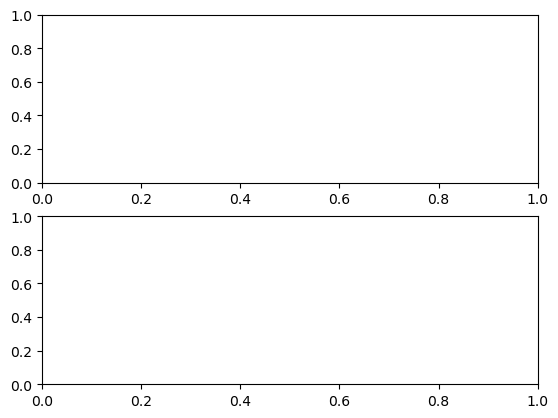

In [30]:
best_model = None
best_mae_test = 1
best_mae_train = 1
best_size = None
best_tol = None
best_iter = None
best_loss = None

history_mae_test = []
history_mae_train = []
sizes = [0.05,0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,0.45,0.5]
sizes = sizes[::-1]
losses = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
tols = [1e-3,1e-4,1e-5,1e-6]
max_iters = [1000,2000]
print(sizes)

# for iter1 in max_iters:
for iter1 in max_iters:
    for loss1 in losses:
        for tol1 in tols:
            model = SGDRegressor(loss=loss1, max_iter=iter1, tol=tol1, learning_rate = 'adaptive', shuffle = True)
            for size in sizes:
                train2_X, val_x, train2_Y, val_y = train_test_split(train_X, train_Y, test_size=size, random_state=1)
                model.fit(train2_X, train2_Y)
                pred = model.predict(val_x)
                pred_train = model.predict(train2_X)
                
                mae_test = mean_absolute_error(val_y, pred)
                mae_train = mean_absolute_error(train2_Y, pred_train)
                history_mae_test.append(mae_test)
                history_mae_train.append(mae_train)
                
                if mae_test < best_mae_test:
                    best_model = model
                    best_mae_test = mae_test
                    best_size = size
                    best_iter = iter1
                    best_loss = loss1
                    best_tol = tol1
                if mae_train < best_mae_train:
                    best_mae_train = mae_train
        
train_X,test_x, train_Y, test_y = train_test_split(X, y, test_size=best_size, random_state=1)
print(mean_absolute_error(test_y, best_model.predict(test_x)))     
print(mean_absolute_error(train_Y, best_model.predict(train_X)))  

figure, axis = plt.subplots(2,1)


# axis[0].plot(sizes, history_mae_test)
# axis[0].set_title("Mae Function Test")
# plt.subplots_adjust(hspace = 0.5)
# axis[1].plot(sizes, history_mae_train)
# axis[1].set_title("Mae Function Train")

plt.show()

In [ ]:
print(r2_score(test_y, best_model.predict(test_x)))     
print(r2_score(train_Y, best_model.predict(train_X))) 

In [ ]:
from scipy.stats import probplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
 
def diagnostics(y, y_pred):
  residuals = y - y_pred
  residuals_mean = np.round(np.mean(y - y_pred), 3)
 
  f, ((ax_rkde, ax_prob), (ax_ry, ax_auto), (ax_yy, ax_ykde)) = plt.subplots(nrows = 3,
                                                                             ncols = 2,
                                                                             figsize = (12, 18))
 
  # в первом подграфике построим график плотности остатков
  sns.kdeplot(residuals, fill = True, ax = ax_rkde)
  ax_rkde.set_title('Residuals distribution', fontsize = 14)
  ax_rkde.set(xlabel = f'Residuals, mean: {residuals_mean}')
  ax_rkde.set(ylabel = 'Density')
 
  # во втором - график нормальной вероятности остатков
  probplot(residuals, dist = 'norm', plot = ax_prob)
  ax_prob.set_title('Residuals probability plot', fontsize = 14)
 
  # в третьем - график остатков относительно прогноза
  ax_ry.scatter(y_pred, residuals)
  ax_ry.set_title('Predicted vs. Residuals', fontsize = 14)
  ax_ry.set(xlabel = 'y_pred')
  ax_ry.set(ylabel = 'Residuals')
 
  # в четвертом - автокорреляцию остатков
  plot_acf(residuals, lags = 30, ax = ax_auto)
  ax_auto.set_title('Residuals Autocorrelation', fontsize = 14)
  ax_auto.set(xlabel = f'Lags \ndurbin_watson: {durbin_watson(residuals).round(2)}')
  ax_auto.set(ylabel = 'Autocorrelation')
 
  # в пятом - сравним прогнозные и фактические значения
  ax_yy.scatter(y, y_pred)
  ax_yy.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw = 1)
  ax_yy.set_title('Actual vs. Predicted', fontsize = 14)
  ax_yy.set(xlabel = 'y_true')
  ax_yy.set(ylabel = 'y_pred')
 
  # в шестом - сравним распределение истинной и прогнозной целевой переменных
  sns.kdeplot(y, fill = True, ax = ax_ykde, label = 'y_true')
  sns.kdeplot(y_pred, fill = True, ax = ax_ykde, label = 'y_pred')
  ax_ykde.set_title('Actual vs. Predicted Distribution', fontsize = 14)
  ax_ykde.set(xlabel = 'y_true and y_pred')
  ax_ykde.set(ylabel = 'Density')
  ax_ykde.legend(loc = 'upper right', prop = {'size': 12})
 
  plt.tight_layout()
 
  plt.show()
    